# Note

素数探索のプログラム例を示す。

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import time

# 素数かどうか調べる関数

In [3]:
def is_prime(n):
    """
    n が素数かどうか調べるプログラム。素数であれば True を、そうでなければ False を返す。
    args:
    + n: integer larger than 1
    return:
    + boolean: True if n is a prime, False if n is not a prime.
    """
    for i in range(2,n):
        if n%i == 0:
            return False
    return True

## 上記関数のテスト

In [4]:
is_prime(11)

True

In [5]:
is_prime(9)

False

# 探索を行うスクリプト

In [6]:
before = time.time()

primes1 = []
found_times1 = []

n = 2
while len(primes1) < 10000:
    if is_prime(n):
        primes1.append(n)
        found_times1.append(time.time()-before)
    n += 1
    
after = time.time()

print('calculation took ' + str(after - before) + ' s.')

calculation took 112.151664019 s.


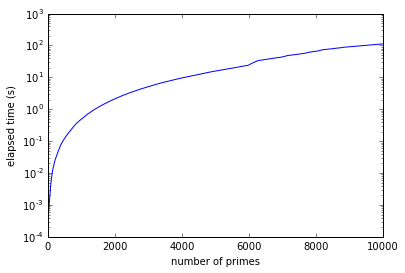

In [7]:
plt.plot(found_times1)
plt.xlabel('number of primes')
plt.ylabel('elapsed time (s)')
plt.yscale('log')

# 素数かどうか調べる関数2

二乗が n を超えない範囲で探索する。

In [8]:
def is_prime_fast(n):
    """
    n が素数かどうか調べるプログラム。素数であれば True を、そうでなければ False を返す。
    args:
    + n: integer larger than 1
    return:
    + boolean: True if n is a prime, False if n is not a prime.
    """
    imax = int(np.ceil(np.sqrt(1.0*n))) # 平方根に近い整数に変換する
    for i in range(2,min(n, imax+1)): # n-1もしくは sqrt(n) まで探索する。
        if n%i == 0:
            return False
        if i > imax:
            break
    return True

## 上記関数のテスト

In [9]:
is_prime_fast(11)

True

In [10]:
is_prime_fast(9)

False

In [11]:
is_prime_fast(2)

True

# 探索を行うスクリプト

In [12]:
before = time.time()

primes2 = []
found_times2 = []

n = 2
while len(primes2) < 10000:
    if is_prime_fast(n):
        primes2.append(n)
        found_times2.append(time.time()-before)
    n += 1
    
after = time.time()

print('calculation took ' + str(after - before) + ' s.')

calculation took 0.752431869507 s.


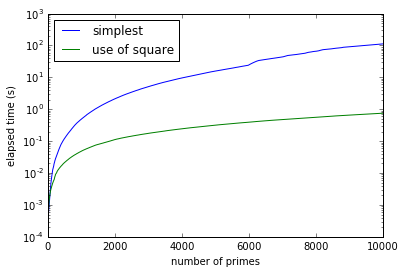

In [13]:
plt.plot(found_times1, label='simplest')
plt.plot(found_times2, label='use of square')
plt.xlabel('number of primes')
plt.ylabel('elapsed time (s)')
plt.yscale('log')
plt.legend(loc='best')

# これまでの履歴を用いた探索

In [14]:
def is_prime_history(n, primes):
    """
    ある整数 n>1 が素数かどうか調べる関数。これまで見つけた素数のリストを用いて探索を高速化する。
    primes にはこれまで探索した n より小さい素数が格納されている。
    args:
    + n: integer larger than 1
    + primes: array-like of prime numbers that is already found.
    return:
    + boolean: True if n is a prime, False if n is not a prime.
    """
    imax = int(np.ceil(np.sqrt(1.0*n))) # 平方根に近い整数に変換する
    for i in primes:
        if n%i == 0:
            return False
        if i > imax:
            break
    return True

## 上記関数のテスト

In [15]:
is_prime_history(11, [2,3,5,7,9])

True

In [16]:
is_prime_history(12, [2,3,5,7,9])

False

# 探索を行うスクリプト

In [17]:
before = time.time()

primes3 = []
found_times3 = []

n = 2
while len(primes3) < 10000:
    if is_prime_history(n, primes3):
        primes3.append(n)
        found_times3.append(time.time()-before)
    n += 1
    
after = time.time()

print('calculation took ' + str(after - before) + ' s.')

calculation took 0.389986991882 s.


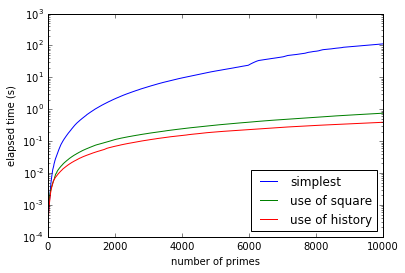

In [18]:
plt.plot(found_times1, label='simplest')
plt.plot(found_times2, label='use of square')
plt.plot(found_times3, label='use of history')
plt.xlabel('number of primes')
plt.ylabel('elapsed time (s)')
plt.yscale('log')
plt.legend(loc='best')

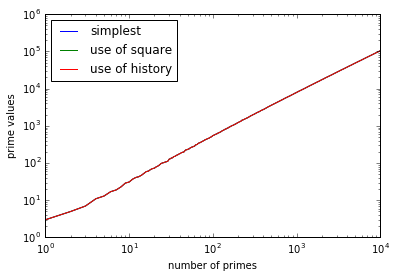

In [20]:
plt.plot(primes1, label='simplest')
plt.plot(primes2, label='use of square')
plt.plot(primes3, label='use of history')
plt.xlabel('number of primes')
plt.ylabel('prime values')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')